### The purpose of this notebook is to practice API Calls and Webscraping for the project. If the results of this practice are usable, **great**. If not, keep trying. It will become usable.


**Important Link** https://developers.themoviedb.org/3/discover/movie-discover

In [49]:
!pip install requests
import requests
import pandas as pd
import numpy as np
import json
from bs4 import BeautifulSoup

In [50]:
# Creating a list of 500 urls for the 500 pages of data I need
# For each number in the range of [1-501) add it where 'i' is in the url below
url_list = []
for i in range(1,501):
    url_list.append(str(f"http://api.themoviedb.org/3/discover/movie?api_key=41f8edb29d800a88a356853208f114f0&sort_by=popularity.desc&page={i}"))

      

    
    
    
    

In [51]:
# Creating a new list for store all of my urls
movies = []
for url in url_list:
    movies.append(requests.get(url))

# Creating a new list to store all of my response-object-JSON's from the GET requests
movies_json = []
for movie in movies:
    movies_json.append(movie.json())

# New list to store all of the 'results' for each movie
movies_results = []
for item in movies_json:
        # Using concatenation, not appending
    movies_results = movies_results + item['results']

In [52]:
# Confirming the code added 10,000 separate dictionaries to this list
# Not 500 separate lists (1 list per page)
len(movies_results)
# Success

10000

In [53]:
movies_df = pd.DataFrame.from_dict(movies_results)

In [54]:
# Sorting the list of 10k movies by popularity
# Permanently changing the data structure via 'inplace=True'
movies_df.sort_values(by='popularity', ascending=False, inplace=True)
movies_df.set_index('title', inplace=True)


In [55]:
movies_df.head(3)

,popularity,vote_count,video,poster_path,id,adult,backdrop_path,original_language,original_title,genre_ids,vote_average,overview,release_date
title,,,,,,,,,,,,,
A Rainy Day in New York,1403.185,585,False,/uPGq1mkEXznUpapDmOSxbsybjfp.jpg,475303,False,/6fkqwqLEcDZOEAnBBfKAniwNxtx.jpg,en,A Rainy Day in New York,"[35, 10749]",6.7,Two young people arrive in New York to spend a...,2019-07-26
Ad Astra,323.546,2478,False,/xBHvZcjRiWyobQ9kxBhO6B2dtRI.jpg,419704,False,/5BwqwxMEjeFtdknRV792Svo0K1v.jpg,en,Ad Astra,"[12, 18, 9648, 878, 53]",6.0,"The near future, a time when both hope and har...",2019-09-17
Sonic the Hedgehog,247.587,525,False,/aQvJ5WPzZgYVDrxLX4R6cLJCEaQ.jpg,454626,False,/qonBhlm0UjuKX2sH7e73pnG0454.jpg,en,Sonic the Hedgehog,"[28, 35, 878, 10751]",7.1,Based on the global blockbuster videogame fran...,2020-02-12


In [56]:
# Making a list of names for a sample SNS Barplot
names = list(movies_df.index)[0:10]
names

['A Rainy Day in New York',
 'Ad Astra',
 'Sonic the Hedgehog',
 'Jumanji: The Next Level',
 'The Invisible Man',
 'Parasite',
 'Frozen II',
 'Dragonheart: Vengeance',
 'Birds of Prey (and the Fantabulous Emancipation of One Harley Quinn)',
 "Charlie's Angels"]

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

UsageError: Line magic function `%` not found.


[Text(0, 0, 'A Rainy Day in New York'),
 Text(0, 0, 'Ad Astra'),
 Text(0, 0, 'Sonic the Hedgehog'),
 Text(0, 0, 'Jumanji: The Next Level'),
 Text(0, 0, 'The Invisible Man'),
 Text(0, 0, 'Parasite'),
 Text(0, 0, 'Frozen II'),
 Text(0, 0, 'Dragonheart: Vengeance'),
 Text(0, 0, 'Birds of Prey (and the Fantabulous Emancipation of One Harley Quinn)'),
 Text(0, 0, "Charlie's Angels")]

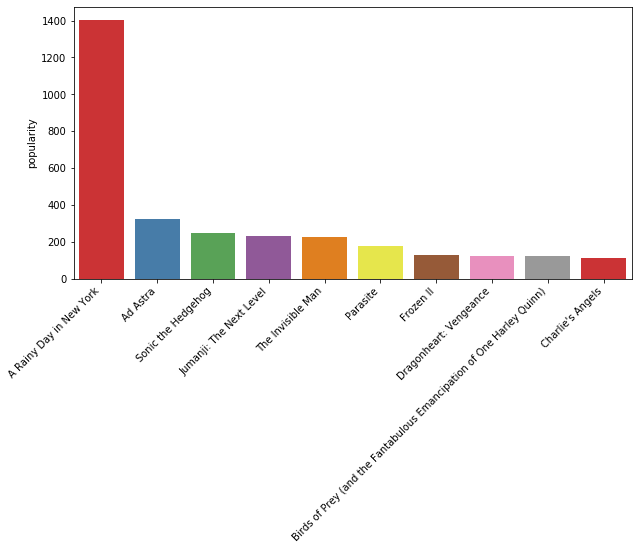

In [58]:
# Making a barchart of the top 10 most popular movies in my list
plt.figure(figsize=(10,5))
pop_chart = sns.barplot(names, movies_df['popularity'][0:10], palette='Set1')

# Turning the tick labels on a 45
pop_chart.set_xticklabels(
    pop_chart.get_xticklabels(),
    rotation = 45, horizontalalignment = 'right')

### Does popularity equate to higher profit margins?

### Are there any genres experiencing higher profit margins?
### Are there any languages experiencing higher profit margins?
----------------
## Bonus:
   ### What is the profit velocity? (profit vs. time)
 

In [59]:
# movies_df[['popularity']].to_csv(r'/Users/davestearns/Documents/FlatIron/Mod1 Project/mod1_project-master\popularity_df.csv')

In [120]:
scrape_list = []
for i in range(1977,2021):
    scrape_list.append(f"https://www.boxofficemojo.com/year/world/{i}/")
scrape_list

['https://www.boxofficemojo.com/year/world/1977/',
 'https://www.boxofficemojo.com/year/world/1978/',
 'https://www.boxofficemojo.com/year/world/1979/',
 'https://www.boxofficemojo.com/year/world/1980/',
 'https://www.boxofficemojo.com/year/world/1981/',
 'https://www.boxofficemojo.com/year/world/1982/',
 'https://www.boxofficemojo.com/year/world/1983/',
 'https://www.boxofficemojo.com/year/world/1984/',
 'https://www.boxofficemojo.com/year/world/1985/',
 'https://www.boxofficemojo.com/year/world/1986/',
 'https://www.boxofficemojo.com/year/world/1987/',
 'https://www.boxofficemojo.com/year/world/1988/',
 'https://www.boxofficemojo.com/year/world/1989/',
 'https://www.boxofficemojo.com/year/world/1990/',
 'https://www.boxofficemojo.com/year/world/1991/',
 'https://www.boxofficemojo.com/year/world/1992/',
 'https://www.boxofficemojo.com/year/world/1993/',
 'https://www.boxofficemojo.com/year/world/1994/',
 'https://www.boxofficemojo.com/year/world/1995/',
 'https://www.boxofficemojo.com

In [121]:
soups = []
for url in scrape_list:
    soups.append(requests.get(url))

In [122]:
new = []
for soup in soups:
    new.append(BeautifulSoup(soup.content, 'html.parser'))

In [123]:
# This will get me the links on each page of each movie 
link_list = []   
for content in new:
    for record in content.findAll('tr'):
        for data in record.findAll('td'):
            for link in data.findAll('a', href=True):
                link_list.append(link['href'])
link_list

['/releasegroup/gr22499845/?ref_=bo_ydw_table_1',
 '/releasegroup/gr544363013/?ref_=bo_ydw_table_2',
 '/releasegroup/gr3946861061/?ref_=bo_ydw_table_3',
 '/releasegroup/gr1304711685/?ref_=bo_ydw_table_4',
 '/releasegroup/gr3980546565/?ref_=bo_ydw_table_5',
 '/releasegroup/gr4096283141/?ref_=bo_ydw_table_6',
 '/releasegroup/gr2182173189/?ref_=bo_ydw_table_7',
 '/releasegroup/gr1932218885/?ref_=bo_ydw_table_8',
 '/releasegroup/gr2367246853/?ref_=bo_ydw_table_9',
 '/releasegroup/gr4039791109/?ref_=bo_ydw_table_10',
 '/releasegroup/gr2990952965/?ref_=bo_ydw_table_11',
 '/releasegroup/gr861884933/?ref_=bo_ydw_table_12',
 '/releasegroup/gr1358385669/?ref_=bo_ydw_table_13',
 '/releasegroup/gr3573502469/?ref_=bo_ydw_table_14',
 '/releasegroup/gr4279652869/?ref_=bo_ydw_table_15',
 '/releasegroup/gr4224143877/?ref_=bo_ydw_table_16',
 '/releasegroup/gr3274920453/?ref_=bo_ydw_table_17',
 '/releasegroup/gr3289141765/?ref_=bo_ydw_table_18',
 '/releasegroup/gr974803461/?ref_=bo_ydw_table_19',
 '/rele

In [124]:
url2 = 'https://www.boxofficemojo.com/'
new_links = []
for link in link_list:
    new_links.append(url2 + link)
new_links


['https://www.boxofficemojo.com//releasegroup/gr22499845/?ref_=bo_ydw_table_1',
 'https://www.boxofficemojo.com//releasegroup/gr544363013/?ref_=bo_ydw_table_2',
 'https://www.boxofficemojo.com//releasegroup/gr3946861061/?ref_=bo_ydw_table_3',
 'https://www.boxofficemojo.com//releasegroup/gr1304711685/?ref_=bo_ydw_table_4',
 'https://www.boxofficemojo.com//releasegroup/gr3980546565/?ref_=bo_ydw_table_5',
 'https://www.boxofficemojo.com//releasegroup/gr4096283141/?ref_=bo_ydw_table_6',
 'https://www.boxofficemojo.com//releasegroup/gr2182173189/?ref_=bo_ydw_table_7',
 'https://www.boxofficemojo.com//releasegroup/gr1932218885/?ref_=bo_ydw_table_8',
 'https://www.boxofficemojo.com//releasegroup/gr2367246853/?ref_=bo_ydw_table_9',
 'https://www.boxofficemojo.com//releasegroup/gr4039791109/?ref_=bo_ydw_table_10',
 'https://www.boxofficemojo.com//releasegroup/gr2990952965/?ref_=bo_ydw_table_11',
 'https://www.boxofficemojo.com//releasegroup/gr861884933/?ref_=bo_ydw_table_12',
 'https://www.box

In [131]:
from tqdm import tqdm


In [130]:
new3 = []
for link in new_links:
    html_page_movie = requests.get(link) # Make a get request to retrieve the page
    soup = BeautifulSoup(html_page_movie.content, 'html.parser')
    for item in soup.findAll('div', id="title-summary-refiner"):
        for page in item.findAll('a', href=True):
            new3.append(page['href'])
            print(page['href'])

    

/title/tt0076759/?ref_=bo_gr_ti
/title/tt0075860/?ref_=bo_gr_ti
/title/tt0076666/?ref_=bo_gr_ti
/title/tt0076729/?ref_=bo_gr_ti
/title/tt0075784/?ref_=bo_gr_ti
/title/tt0075925/?ref_=bo_gr_ti
/title/tt0076752/?ref_=bo_gr_ti
/title/tt0076489/?ref_=bo_gr_ti
/title/tt0075686/?ref_=bo_gr_ti
/title/tt0078227/?ref_=bo_gr_ti
/title/tt0076538/?ref_=bo_gr_ti
/title/tt0076138/?ref_=bo_gr_ti
/title/tt0076141/?ref_=bo_gr_ti
/title/tt0076009/?ref_=bo_gr_ti
/title/tt0076618/?ref_=bo_gr_ti
/title/tt0076723/?ref_=bo_gr_ti
/title/tt0076137/?ref_=bo_gr_ti
/title/tt0076070/?ref_=bo_gr_ti
/title/tt0076843/?ref_=bo_gr_ti
/title/tt0076054/?ref_=bo_gr_ti
/title/tt0076507/?ref_=bo_gr_ti
/title/tt0076327/?ref_=bo_gr_ti
/title/tt0076245/?ref_=bo_gr_ti
/title/tt0075718/?ref_=bo_gr_ti
/title/tt0076044/?ref_=bo_gr_ti
/title/tt0076451/?ref_=bo_gr_ti
/title/tt0075765/?ref_=bo_gr_ti
/title/tt0076504/?ref_=bo_gr_ti
/title/tt0075774/?ref_=bo_gr_ti
/title/tt0076211/?ref_=bo_gr_ti
/title/tt0076591/?ref_=bo_gr_ti
/title/t

KeyboardInterrupt: 